In [49]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os.path, sys, re
from PIL import Image
# from resizeimage import resizeimage

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [51]:
from keras.preprocessing import image

<class 'PIL.Image.Image'>
None
L
(2213, 1572)


/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


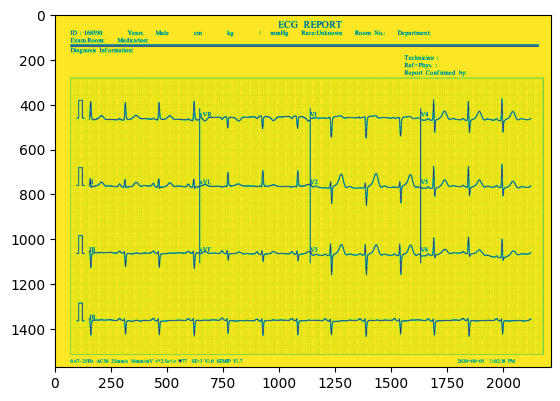

In [91]:
import os
img = image.load_img(os.path.join('/drive/MyDrive/ECG/data_v1/NormalPersonECGImages/Normal(1).jpg'), grayscale=True) #target_size=(28,28), grayscale=True

print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
plt.imshow(img)

In [92]:
left = 130
top = 300
right = 640
bottom = 550

In [93]:
crop_dict = {
    'Lead13': (130, 300, 640, 550),  # Define the coordinates for 'Lead13'
    # Add more crop regions if needed
}


In [94]:
img_res = img.crop(crop_dict['Lead13'])
# img_res.show()


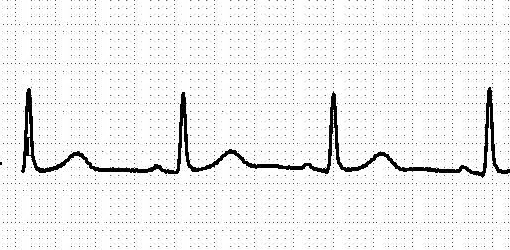

In [95]:
img_res

In [96]:
crop_dict={}
crop_dict={ 'Lead1':(130,300,640,550), 'Lead2':(700,350,1130,550),\
           'Lead3':(1190,350,1620,550), 'Lead4':(1670,350,2110,550),\
           'Lead5':(130,600,640,850), 'Lead6':(700,600,1130,850),\
           'Lead7':(1190,600,1620,850), 'Lead8':(1670,600,2110,850),\
           'Lead9':(130,900,640,1150), 'Lead10':(700,900,1130,1150),\
           'Lead11':(1190,900,1620,1150), 'Lead12':(1670,900,2110,1150),\
           'Lead13':(130,1200,2110,1450)

          }

In [97]:

def crop():
    for item in dirs:
        if item== '.DS_Store':
            continue

        if os.path.isfile(path+item):

            #print('Yes')
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)

            of, oe = os.path.splitext(item)

            for i in range(1,14):
                imCrop = im.crop(box=crop_dict['Lead'+str(i)])
                imCrop.save(path2+of+'Cropped_lead'+str(i)+'.png', "PNG", quality=100)
            #except I0


for i in range(1,5):

    if i==1:
        path = "/drive/MyDrive/ECG/CroppedECGImages_data_v2/Normal/"
        path2="/drive/MyDrive/Normal/Cropped_Images/"

    if i==2:
        path = "/drive/MyDrive/ECG/CroppedECGImages_data_v2/MI/"
        path2="/drive/MyDrive/MI/Cropped_Images/"

    if i==3:
        path = "/drive/MyDrive/ECG/CroppedECGImages_data_v2/PMI/"
        path2="/drive/MyDrive/PMI/Cropped_Images/"

    if i==4:
        path = "/drive/MyDrive/ECG/CroppedECGImages_data_v2/HB/"
        path2="/drive/MyDrive/HB/Cropped_Images/"

    dirs = os.listdir(path)

    crop()


In [98]:
def purge(dir, pattern):
    for f in os.listdir(dir):
        if re.search(pattern, f):
            os.remove(os.path.join(dir, f))
#purge('/drive/MyDrive/ECG/CroppedECGImages_data_v2/Normal/Cropped_Images/','Cropped.*')
#purge('/','Cropped_lead*')

In [99]:
cd /drive/MyDrive/ECG/CroppedECGImages_data_v2/Normal/Cropped_Images/

/drive/MyDrive/ECG/CroppedECGImages_data_v2/Normal/Cropped_Images


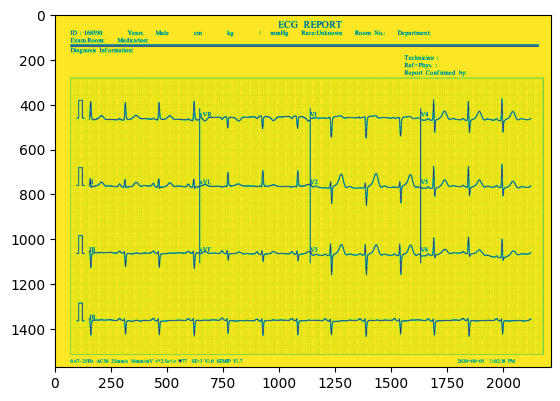

In [100]:
plt.imshow(img)

In [111]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/drive/MyDrive/ECG/data_v1/NormalPersonECGImages/Normal(1).jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Set threshold level
threshold_level = 50

# Find coordinates of all pixels below threshold
coords = np.column_stack(np.where(gray < threshold_level))

print(coords)

# Create mask of all pixels lower than threshold level
mask = gray < threshold_level

# Color the pixels in the mask
img[mask] = (204, 119, 0)


from google.colab.patches import cv2_imshow
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

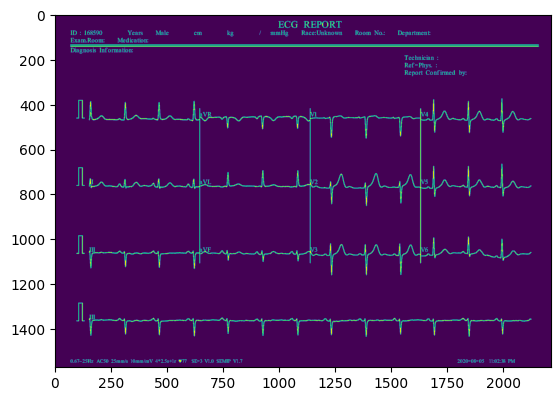

In [112]:
plt.imshow(mask)
# plt.colorbar()

In [113]:
mask.shape

(1572, 2213)

In [114]:
coords.shape

(100660, 2)

In [115]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

(100660, 2)


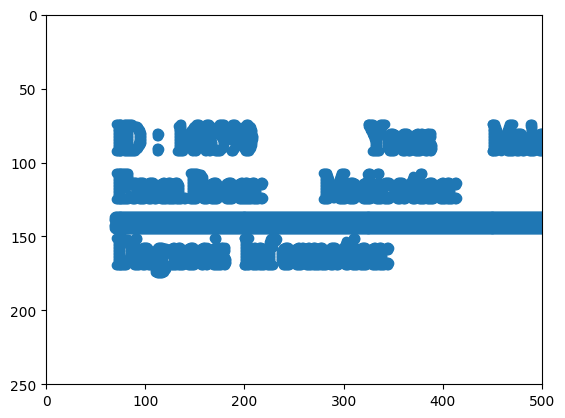

In [117]:
coords = np.column_stack(np.where(gray < threshold_level))

# Check the shape of the array
print(np.array(coords).shape)

# Plot the coordinates
plt.scatter(coords[:, 1], coords[:, 0])
plt.axis([0, 500, 250, 0])
plt.show()


In [118]:
img.shape
gray.shape

(1572, 2213)

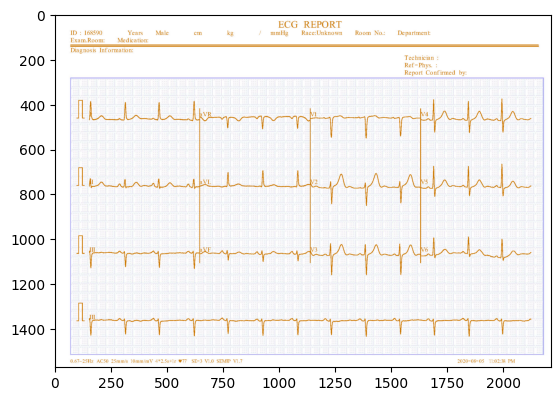

In [119]:
plt.imshow(img)

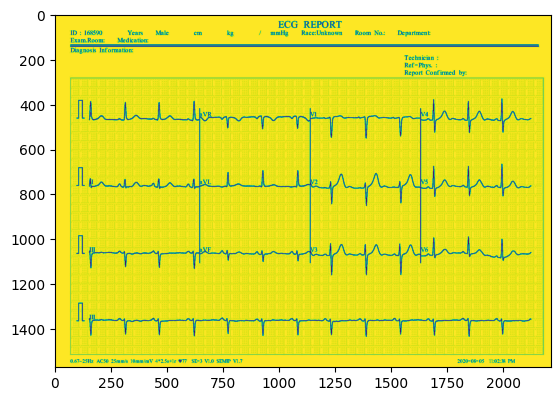

In [120]:
plt.imshow(gray)

In [121]:
def show_graph(x_list, y_list, width, height):
    plt.figure(figsize = [width, height])
    plt.scatter(x_list, y_list, marker='.', s=5)
    plt.show()
    return

In [122]:
gray.shape

(1572, 2213)

In [123]:
gray[0,0]

255

In [124]:
(2, 127072)


(2, 127072)

In [125]:
indices = np.where(gray > 254)

In [126]:
np.array(indices).shape

(2, 1056432)

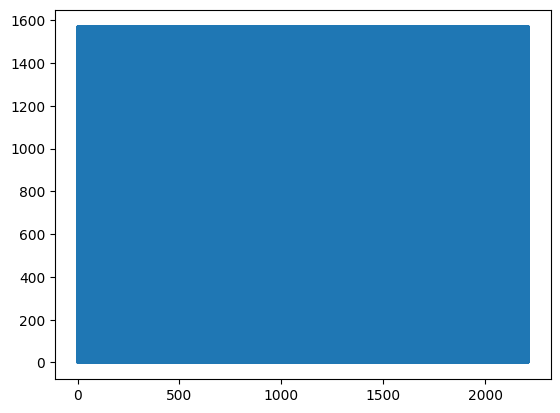

In [127]:
plt.plot(np.array(indices)[1],np.array(indices)[0])

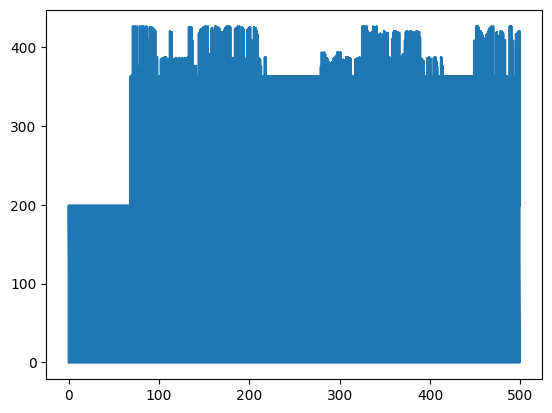

In [129]:
x_list, y_list = [], []
for x in np.arange(0, 500, 1):
    for y in np.arange(0, 200, 1):
        if np.all(gray[x, y] > 200 ):
            x_list.append(x)
            y_list.append(y)

        if np.all(gray[y, x] == (0, 0, 0)):
            x_list.append(x)
            y_list.append(500 - y)

plt.plot(x_list, y_list)
plt.show()


In [130]:
def locate_pos(image, color):
    position_list = []
    y_level = 42
    while len(position_list) == 0 and y_level < 100:
        x=100
        while x<7422:
            if np.all(image[y_level][x] == color):
                position_list.append(x)
                x += 25
            x += 1
        y_level+=2
    return position_list

In [131]:
background_image = cv2.imread('/data/MyDrive/ECG/background.png', cv2.IMREAD_COLOR)
gray_background = cv2.cvtColor(background_image, cv2.COLOR_BGR2GRAY)


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
